In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns
import keras
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing datasets  
df= pd.read_csv('./drive/MyDrive/Dataset/diabetes.csv')  

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [ ]:
x[300:310]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
300,0,167,0,0,0,32.3,0.839,30
301,2,144,58,33,135,31.6,0.422,25
302,5,77,82,41,42,35.8,0.156,35
303,5,115,98,0,0,52.9,0.209,28
304,3,150,76,0,0,21.0,0.207,37
305,2,120,76,37,105,39.7,0.215,29
306,10,161,68,23,132,25.5,0.326,47
307,0,137,68,14,148,24.8,0.143,21
308,0,128,68,19,180,30.5,1.391,25
309,2,124,68,28,205,32.9,0.875,30


In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
y[100:110]

100    1
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    1
Name: Outcome, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
norm_x = scaler.transform(x)
x_train,x_test,y_train,y_test=train_test_split(norm_x,y,test_size=0.20,random_state=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [ ]:
y_train[:10]

120    1
172    0
307    0
7      0
448    1
1      0
538    0
469    0
102    0
510    1
Name: Outcome, dtype: int64

In [ ]:
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)

In [ ]:
y_train[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(614, 8)
(614, 2)


In [ ]:
model=Sequential()
layer1=Dense(32,activation='relu',input_shape=(8,),name="layer1")
model.add(layer1)
model.add(Dropout(0.2))
layer2=Dense(16,activation='relu',name="layer2")
model.add(layer2)
model.add(Dropout(0.2))
layer3=Dense(8,activation='relu',name="layer3")
model.add(layer3)
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 layer3 (Dense)              (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Early Stopping Regularization**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2)


In [ ]:
history=model.fit(x_train,y_train,shuffle='True',validation_data=(x_test,y_test),batch_size=10,epochs=100,callbacks=[early_stopping])

Epoch 1/100
62/62 [==============================] - 1s 5ms/step - loss: 0.6683 - accuracy: 0.6352 - val_loss: 0.6568 - val_accuracy: 0.6234
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6564 - val_loss: 0.6466 - val_accuracy: 0.6169
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6580 - val_loss: 0.6407 - val_accuracy: 0.6169
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6629 - val_loss: 0.6347 - val_accuracy: 0.6169
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6596 - val_loss: 0.6295 - val_accuracy: 0.6169
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.6824 - val_loss: 0.6240 - val_accuracy: 0.6169
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6922 - val_loss: 0.6283 - val_accuracy: 0.6169
Epoch 8/100
6

**Getting Intermediate Values and weights**

In [ ]:
layer1.get_weights

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x7f839c371430>>

In [ ]:
layer1.get_input_at

<bound method Layer.get_input_at of <keras.layers.core.dense.Dense object at 0x7f839c371430>>

**Model Saving**

In [ ]:
model.save('./drive/MyDrive/Dataset/NNDiabetes', save_format='h5')

# **Model Loading**

In [ ]:
from tensorflow.keras.models import load_model
# returns a compiled model
# identical to the previous one
model123 = load_model('./drive/MyDrive/Dataset/NNDiabetes')

In [ ]:
model123.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 layer2 (Dense)              (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 layer3 (Dense)              (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 2)                 1

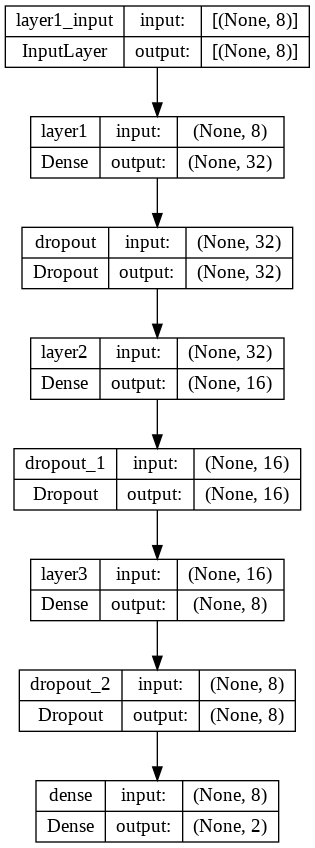

In [ ]:
tf.keras.utils.plot_model(model, to_file="./drive/MyDrive/Dataset/diabetesmodel.png", show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt

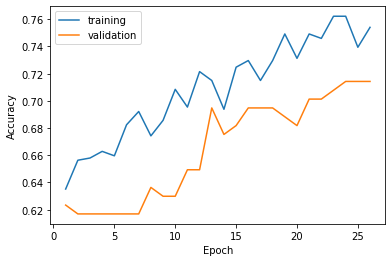

In [ ]:
loss=history.history['loss']
epoch=range(1,len(loss)+1)
plt.plot(epoch,history.history['accuracy'],label='training')
plt.plot(epoch,history.history['val_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

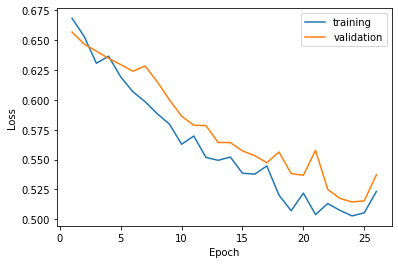

In [ ]:
plt.plot(epoch,history.history['loss'],label='training')
plt.plot(epoch,history.history['val_loss'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('total loss',score[0])
print('test accuracy',score[1])

total loss 0.5372309684753418
test accuracy 0.7142857313156128


In [ ]:
score

[0.5372309684753418, 0.7142857313156128]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred=model.predict(x_test)
pred=np.argmax(y_pred,axis=1)[:5]
label=np.argmax(y_test,axis=1)[:5]
print("Label of the first 5  prediction ",pred)
print("label of the first 5  original ",label)

5/5 [==============================] - 0s 2ms/step
Label of the first 5  prediction  [1 0 1 0 0]
label of the first 5  original  [0 0 0 1 0]


In [ ]:
y_testnew=np.argmax(y_test,axis=1)
y_prednew=np.argmax(y_pred,axis=1)

In [ ]:
cf_matrix = confusion_matrix(y_testnew,y_prednew)
cf_matrix

array([[81, 14],
       [30, 29]])

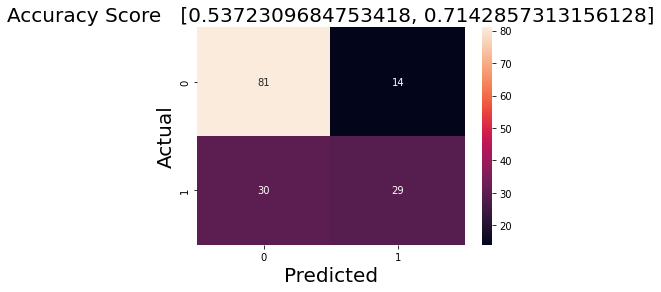

In [ ]:
heatmap = sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.title('Accuracy Score   {0}'.format(score),fontsize=20)
plt.show()


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# **FEATURE EXTRACTION and learning by tracking each layer**

In [ ]:
x_test[0]

array([0.23529412, 0.77386935, 0.59016393, 0.29292929, 0.14893617,
       0.46646796, 0.11101623, 0.26666667])

In [ ]:
output1=model.get_layer("layer1").output 
intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=output1)
intermediate_prediction=intermediate_model.predict(x_test[0].reshape(1,8))
print(intermediate_prediction.shape)
intermediate_prediction

1/1 [==============================] - 0s 37ms/step
(1, 32)


array([[0.147581  , 0.        , 0.        , 0.        , 0.09098625,
        0.20252612, 0.        , 0.03032109, 0.        , 0.18125243,
        0.03113205, 0.08583958, 0.        , 0.02712701, 0.21374166,
        0.        , 0.05659674, 0.20233072, 0.        , 0.12559916,
        0.        , 0.16366985, 0.        , 0.11148703, 0.        ,
        0.01559343, 0.        , 0.19439109, 0.        , 0.        ,
        0.        , 0.05511986]], dtype=float32)

In [ ]:
output2=model.get_layer("layer2").output 
intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=output2)
intermediate_prediction=intermediate_model.predict(x_test[0].reshape(1,8))
print(intermediate_prediction.shape)
intermediate_prediction

1/1 [==============================] - 0s 43ms/step
(1, 16)


array([[0.25845945, 0.        , 0.        , 0.        , 0.07510594,
        0.        , 0.18237999, 0.        , 0.        , 0.        ,
        0.25109708, 0.        , 0.        , 0.        , 0.12532414,
        0.        ]], dtype=float32)

In [ ]:
output3=model.get_layer("layer3").output 
intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=output3)
intermediate_prediction=intermediate_model.predict(x_test[0].reshape(1,8))
print(intermediate_prediction.shape)
intermediate_prediction

1/1 [==============================] - 0s 51ms/step
(1, 8)


array([[0.        , 0.        , 0.27130523, 0.        , 0.33815414,
        0.16031784, 0.        , 0.00459765]], dtype=float32)

# **Transfer learning with a Sequential model**

Transfer learning consists of freezing the bottom layers in a model and only training the top layers. If you aren't familiar with it, make sure to read our guide to transfer learning.

Here are two common transfer learning blueprint involving Sequential models.

First, let's say that you have a Sequential model, and you want to freeze all layers except the last one. In this case, you would simply iterate over model.layers and set layer.trainable = False on each layer, except the last one. Like this:

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])

# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)

NameError: ignored